Here we used OPTICS algorithms to find the clusters. I hope to finde the MS and WD locus.

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table

In [2]:
# Read the data
mag = []
tab = Table.read("../JPLUS_data_6arc.tab", format="ascii.tab")
#tab = Table.read("TAP_DR1SPLUS_HA_r_03.tab", format="ascii.tab")
for da in tab:
    mag.append(da["uJAVA_MAG_APER_6_0"])
    mag.append(da["J0378_MAG_APER_6_0"])
    mag.append(da["J0395_MAG_APER_6_0"])
    mag.append(da["J0410_MAG_APER_6_0"])
    mag.append(da["J0430_MAG_APER_6_0"])
    mag.append(da["gSDSS_MAG_APER_6_0"])
    mag.append(da["J0515_MAG_APER_6_0"])
    mag.append(da["rSDSS_MAG_APER_6_0"])
    mag.append(da["J0660_MAG_APER_6_0"])
    mag.append(da["iSDSS_MAG_APER_6_0"])
    mag.append(da["J0861_MAG_APER_6_0"])
    mag.append(da["zSDSS_MAG_APER_6_0"])

In [3]:
shape = (len(tab["Number"]), 12)
mag_matrix = np.array(mag).reshape(shape)
mag_matrix.shape

(259461, 12)

In [4]:
# Standarized the data
mag_matrix_stand = StandardScaler().fit_transform(mag_matrix)

In [5]:
pca = PCA(n_components=3)
mag_matrix_stand_pca = pca.fit_transform(mag_matrix_stand)

In [6]:
mag_matrix_stand_pca.shape

(259461, 3)

/home/luis/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:1039: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


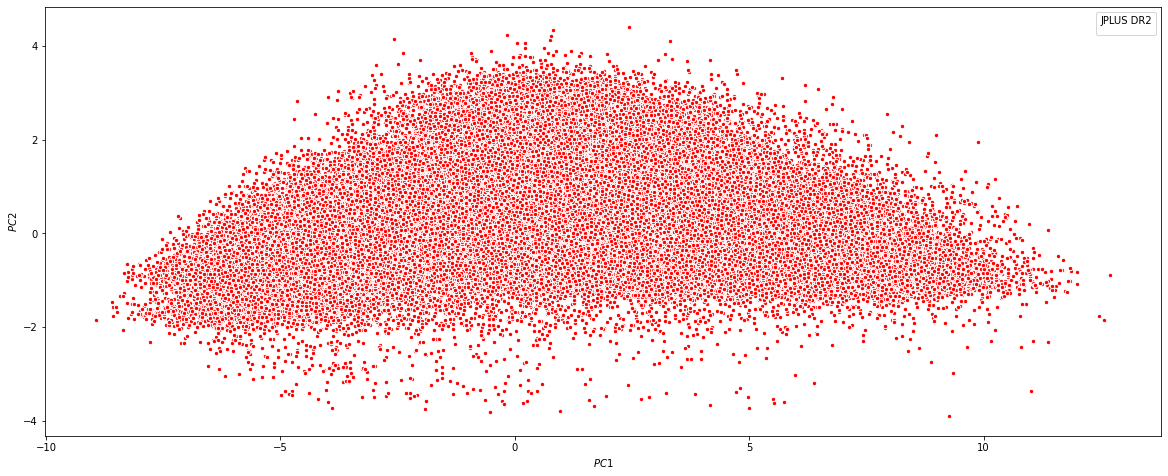

In [7]:
# Plotting PCA results
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))
levels = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 1.0])
GAMMA = 0.05
scatter = ax.scatter(
    mag_matrix_stand_pca[:,0],
    mag_matrix_stand_pca[:,1],
    s=20,
    c="red",
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic",
)
ax.set(
    #xlim=[-2.0, 3.0],
    #ylim=[ymin, ymax],
    xlabel=r"$PC1$",
    ylabel=r"$PC2$",
)
ax.legend(*scatter.legend_elements(), ncol=2, title="JPLUS DR2")
ax.set_aspect("equal")

In [ ]:
clustering = OPTICS(min_samples=6).fit(mag_matrix_stand_pca)
clustering.labels_